In [1]:
# Assignment 2
# Relationship between solar radio flux F10.7 and sunspot number
# Team 2:
#     Ekaterina Karmanova
#     Timur Chikichev
#     Yaroslav Okunev
#     Nikita Mikhailovskiy
#
# Skoltech, 01.10.2019

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [3]:
#1
#1.1
def random_walk(random):
    counts = len(random)
    array = np.zeros(counts)

    array[0] = 10
    for i in range (1,counts):
        array[i] = array[i-1] + random[i]
    
    return array

c = 3000
c2 = 300
s2w = 9

w3000 = np.random.normal(0,np.sqrt(s2w),c)
w300 = np.random.normal(0,np.sqrt(s2w),c2)

x3000 = random_walk(w3000)
x300 = random_walk(w300)

In [4]:
#1.2
s2n = 12
z3000 = np.zeros(c)
n3000 = np.random.normal(0,np.sqrt(s2n),c)
z300 = np.zeros(c2)
n300 = np.random.normal(0,np.sqrt(s2n),c2)

for i in range (0,c):
    z3000[i] = x3000[i] + n3000[i]
for i in range (0,c2):
    z300[i] = x300[i] + n300[i]

In [5]:
#2 Calculation
def Ev2(w, n):
    count = len(w)
    pre = 1/(count-1)
    s = 0
    
    for k in range (1,count):
        s += (w[k]+n[k]-n[k-1])**2
    
    return pre*s
    
def Er2(w, n):
    count = len(w)
    pre = 1/(count-2)
    s = 0
    
    for k in range (2,count):
        s += (w[k]+w[k-1]+n[k]-n[k-2])**2
    
    return pre*s

calculated_s2w_3000 = Er2(w3000,n3000) - Ev2(w3000,n3000) 
calculated_s2n_3000 = Ev2(w3000,n3000) - Er2(w3000,n3000)/2

print('For 3000 points')
print(calculated_s2w_3000,calculated_s2n_3000)

calculated_s2w_300 = Er2(w300,n300) - Ev2(w300,n300) 
calculated_s2n_300 = Ev2(w300,n300) - Er2(w300,n300)/2

print('For 300 points')
print(calculated_s2w_300,calculated_s2n_300)

For 3000 points
8.908495118065431 11.86247872200023
For 300 points
5.971878569305147 13.358780011872732


In [6]:
#2 Errors
error_s2w_3000 = (s2w - calculated_s2w_3000)/s2w * 100
error_s2n_3000 = (s2n - calculated_s2n_3000)/s2n * 100

error_s2w_300 = (s2w - calculated_s2w_300)/s2w * 100
error_s2n_300 = (s2n - calculated_s2n_300)/s2n * 100

print('Error of sigma (w,n) in power of 2 width 3000 points (%)')
print(error_s2w_3000,error_s2n_3000)

print('Error of sigma (w,n) in power of 2 width 300 points (%)')
print(error_s2w_300,error_s2n_300)

Error of sigma (w,n) in power of 2 width 3000 points (%)
1.0167209103840946 1.146010649998086
Error of sigma (w,n) in power of 2 width 300 points (%)
33.64579367438726 -11.323166765606096


In [7]:
#3
X = s2w/s2n
print(X)

a = (-X + np.sqrt(X**2+4*X))/2
print(a)

0.75
0.5687293044088437


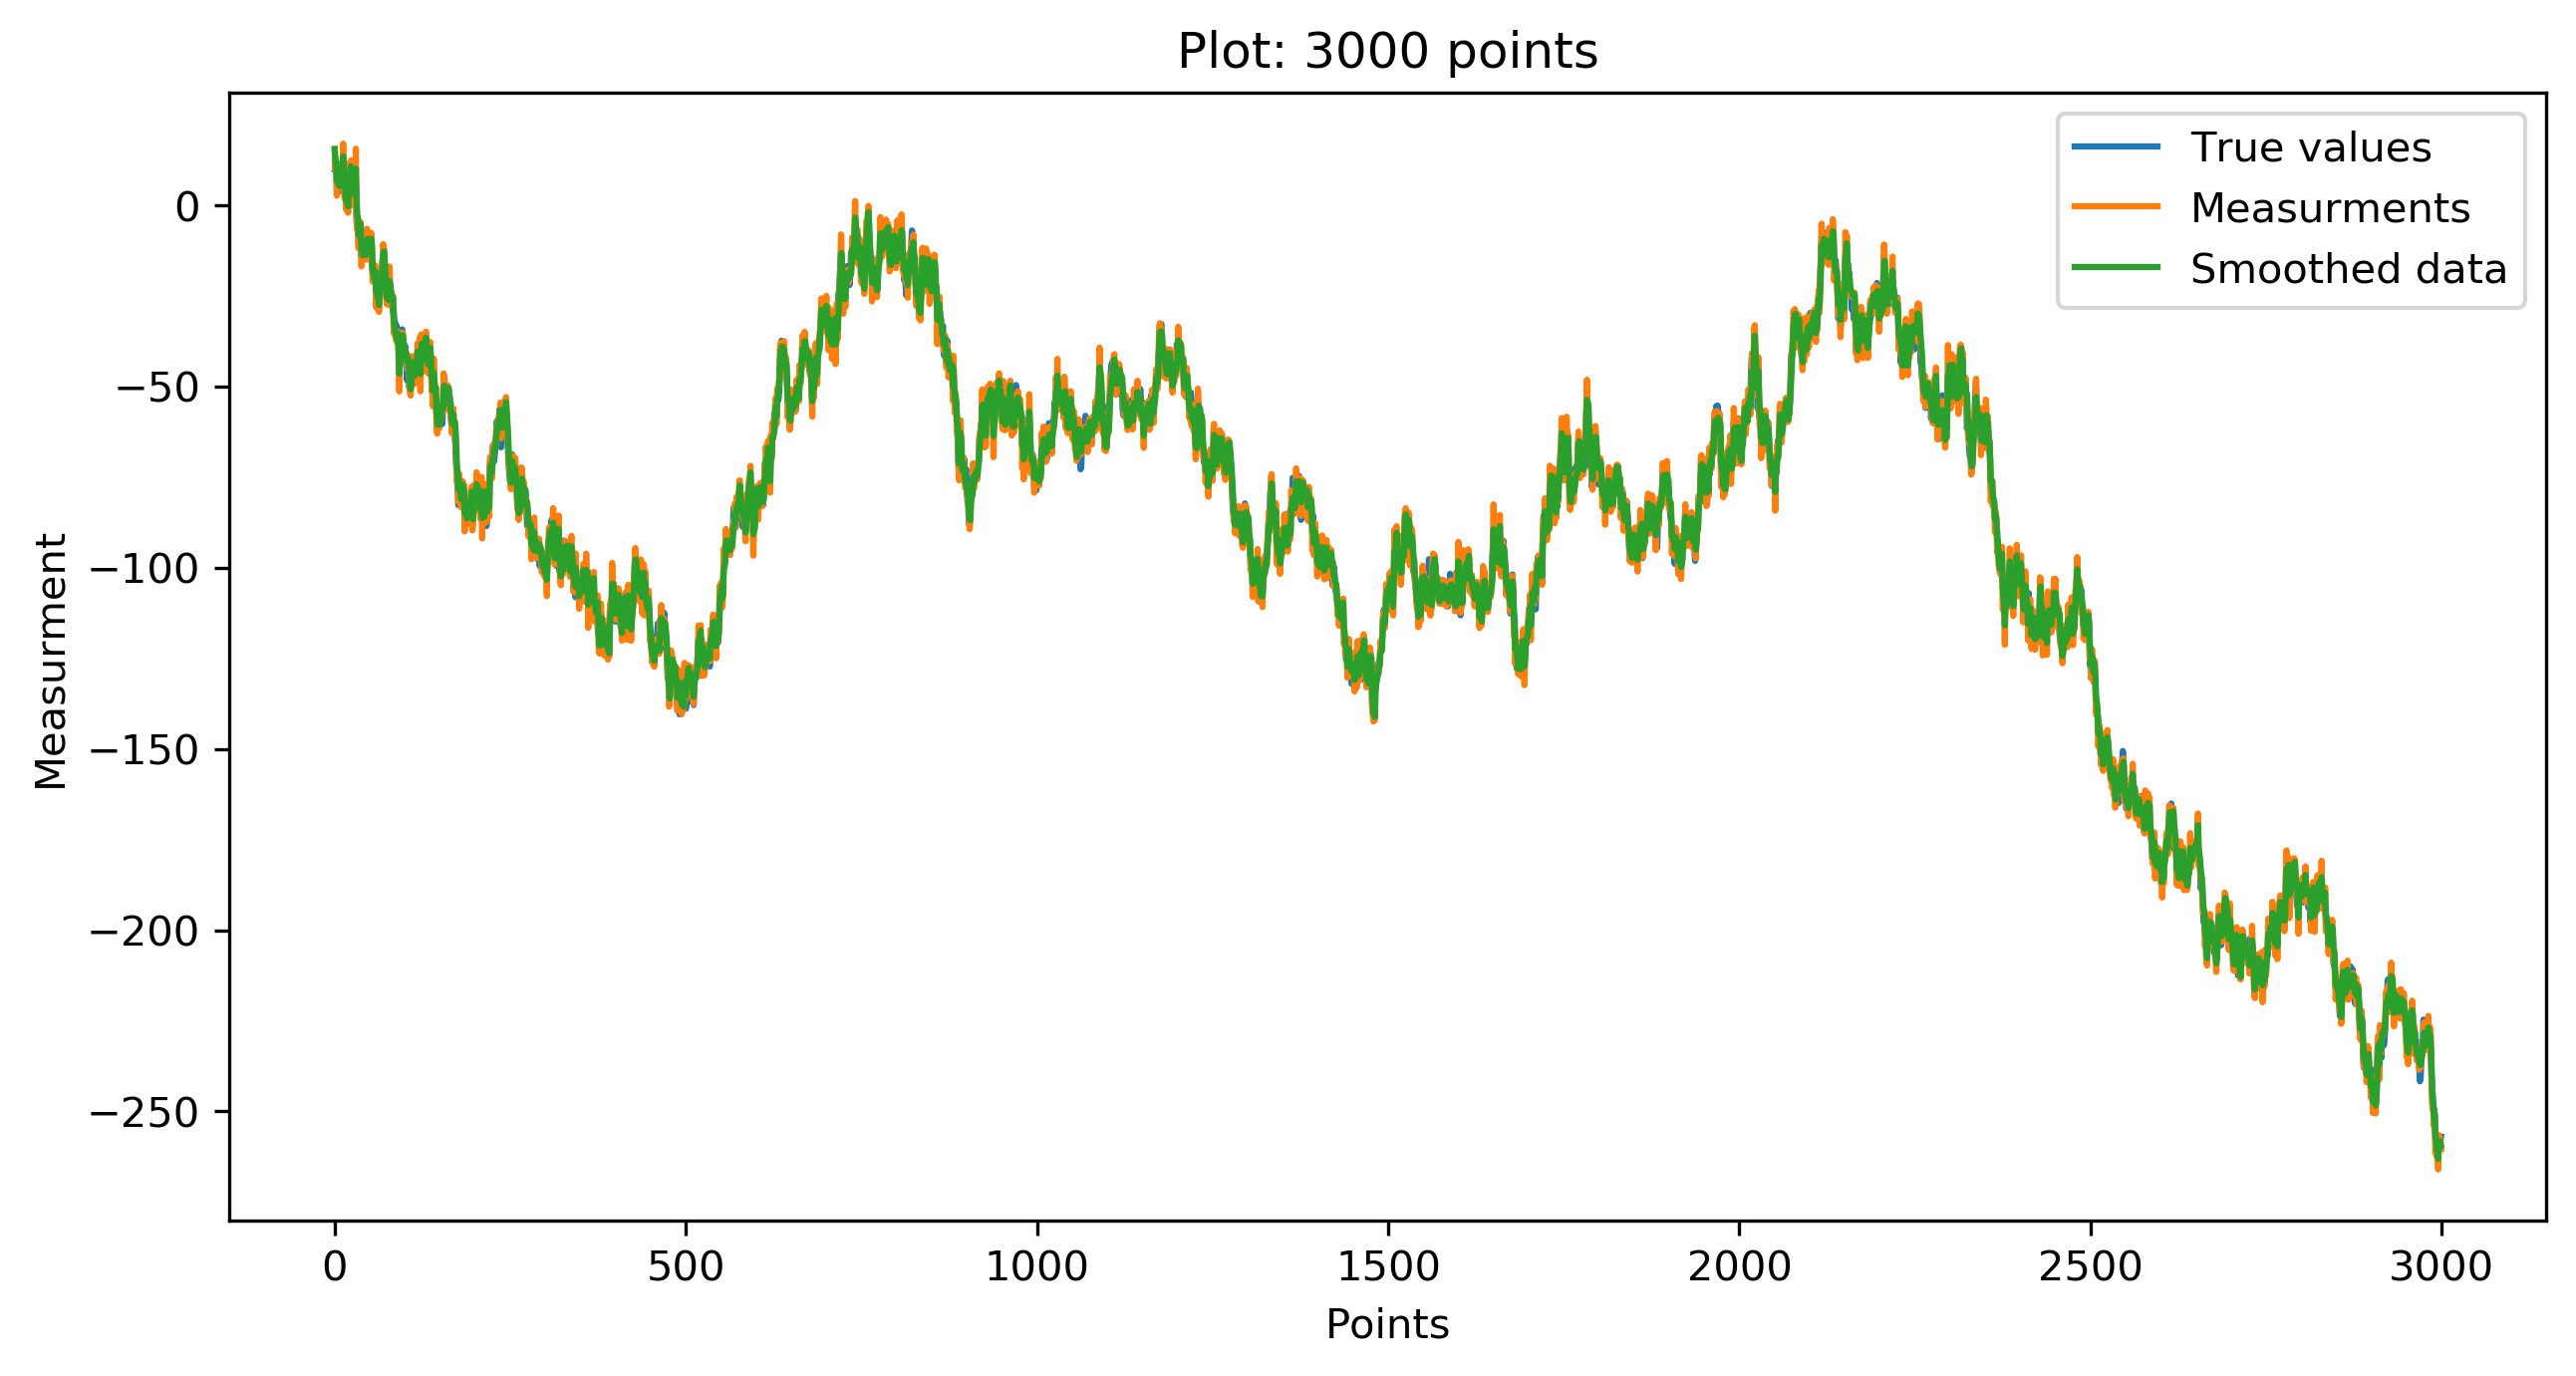

In [8]:
#4 Smoothing
sm_z3000 = np.zeros(3000)
sm_z300 = np.zeros(300)

sm_z3000[0] = z3000[0]
sm_z300[0] = z300[0]

for i in range (1,c):
    sm_z3000[i] = sm_z3000[i-1] + a*(z3000[i]-sm_z3000[i-1])
for i in range (1,c2):
    sm_z300[i] = sm_z300[i-1] + a*(z300[i]-sm_z300[i-1])

figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: 3000 points')    
plt.plot(x3000, label='True values')
plt.plot(z3000, label='Measurments')
plt.plot(sm_z3000, label='Smoothed data')
plt.xlabel('Points')
plt.ylabel('Measurment')
plt.legend()
plt.show() 


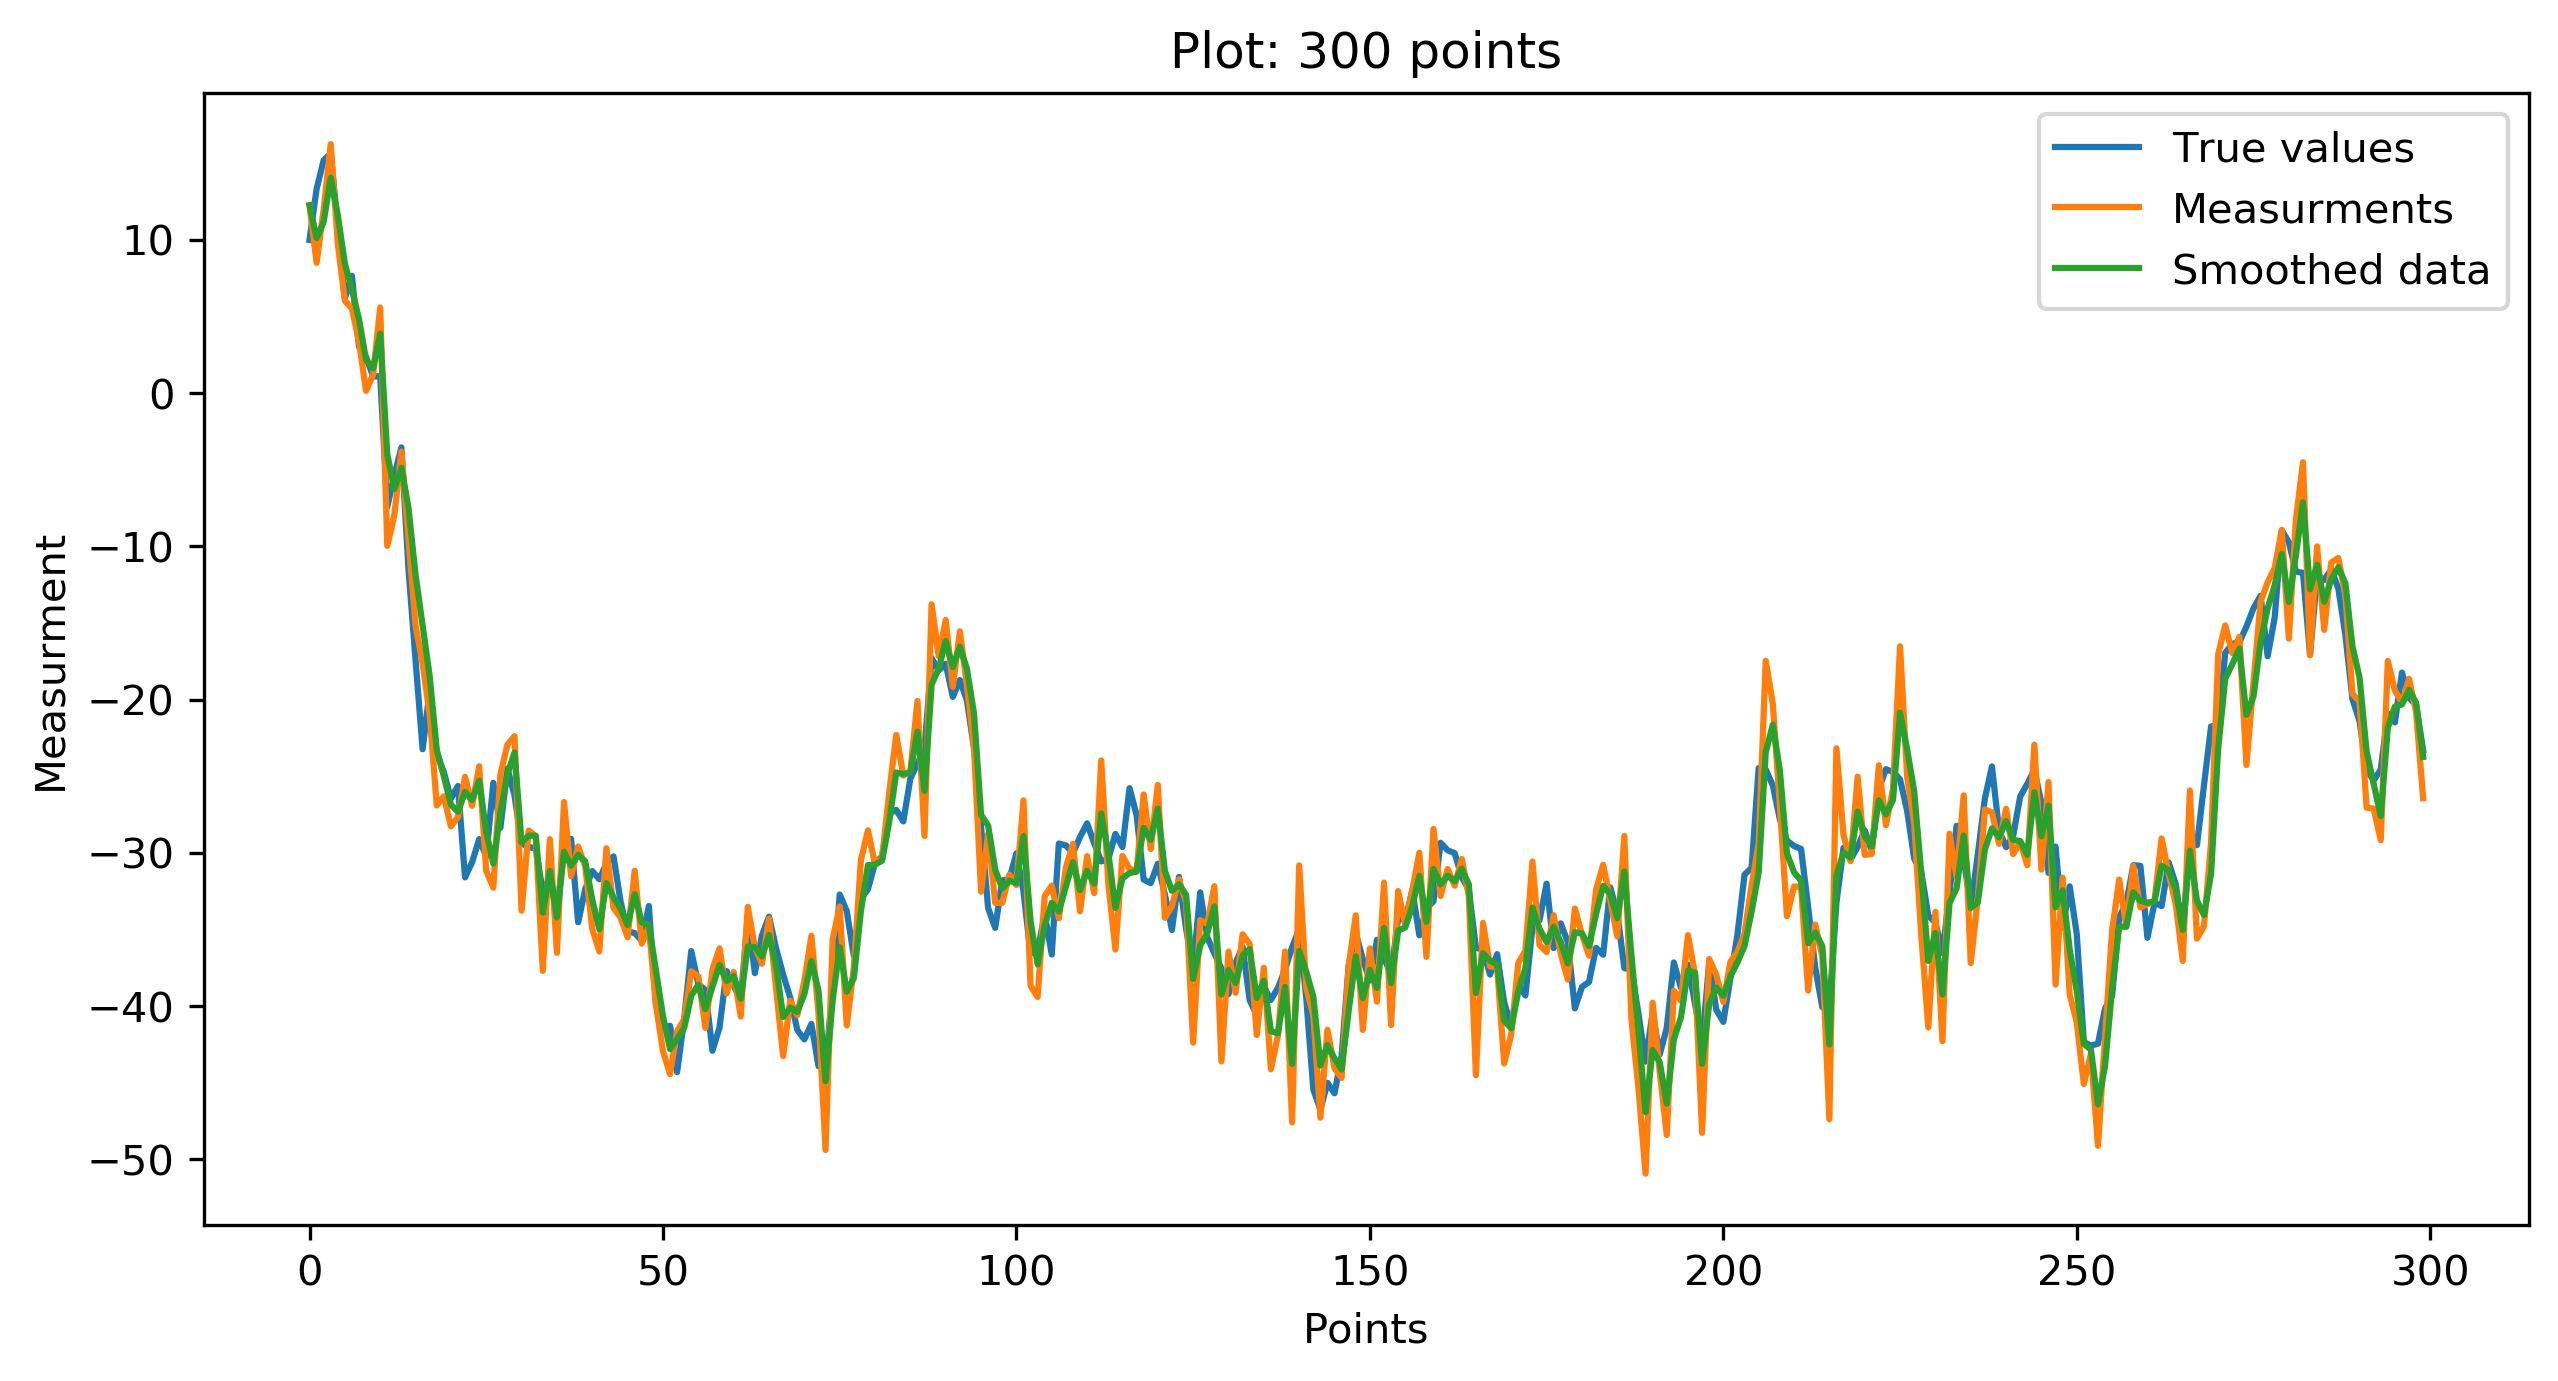

In [9]:
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: 300 points')    
plt.plot(x300, label='True values')
plt.plot(z300, label='Measurments')
plt.plot(sm_z300, label='Smoothed data')
plt.xlabel('Points')
plt.ylabel('Measurment')
plt.legend()
plt.show() 